# Giriş

## Veri Temizleme

- Gürültülü Veri (Noisy Data)
- Eksik Veri Analizi (Missing Data Analysis)
- Aykırı Gözlem Analizi (Outlier Analysis)

## Veri Standardizasyonu (Data Standardization, Feature Scaling)

- 0-1 Döüşümü (Normalization)
- z-skoruna Dönüştürme (Standardization)
- Logaritmik Dönüşüm (Log Transformation)

## Veri İndirgeme (Data Reduction)

- Gözlem (Observation) Sayısının Azaltılması
- Değişken (Variable) Sayısının Azaltılması

## Değişken Dönüşümleri (Variable Transformation)

- Sürekli değişkenlerde dönüşümler
- Kategorik değişkenlerde dönüşümler

# Aykırı Gözlem

Veride genel eğilimin oldukça dışına çıkan ya da diğer gözlemlerden oldukça farklı olan gözlemlere aykırı gözlem denir. Aykırı değeri barındıran gözlem birimine **aykırı gözlem** denir.

## Aykırı Değer

Aykırılığı ifade eden nümerik değere **aykırı değer** denir.

## Aykırı Değer Neye Sebep Olur?

Genellenebilirlik kaygısı ile oluşturulan kural setlerini ya da fonksiyonları yanıltır. Yanlılığa sebep olur.

# Kime Göre Neye Göre Aykırı Gözlem?

* Sektör Bilgisi
    - Bize neyin aykırı olup olmadığını bilmeyi sağlar. Ör: 1000 metrekarelik evleri modellemeye almamak.
* Standart Sapma Yaklaşımı
    - Bir değişkenin ortalaması üzerine o değişkenin standar sapması eklenir. 1,2 ya da 3 standar sapma değeri ortalama üzerine eklenerek elde edilen değere eşik değer denilir. Bu değerden yukarıda ya da aşağıda olan değerler aykırı değer olarak tanımlanır.
* Z-Skoru Yaklaşımı
    - Standart sapma yöntemine benzer şekilde çalışır. Standartlaştırma işlemi sonrasında örneğin dağılımın sağından ve solundan +-2.5 değerine göre bir eşik değer konulur ve bu değerin üzerinde ya da altında olan değerler aykırı olarak işaretlenir.
* Boxplot (interquantile range - IQR) Yöntemi
    - En sık kullanılan yöntemlerdendir. Değişken kçükten büyüğe sıralanır. Çeyrekliklerine karşılık gelen değerler üzerinden bir eşik değer hesaplanır ve bu eşik değere göre aykırı değer tanımı yapılır.

# Tek Değişkenli Aykırı Gözlem Analizi

In [1]:
import seaborn as sns

df = sns.load_dataset('diamonds')
df = df.select_dtypes(include=['float64', 'int64'])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [2]:
tbl = df['table']
tbl.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

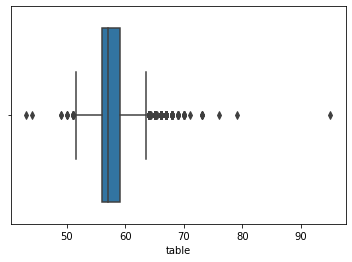

In [3]:
sns.boxplot(x=tbl)

In [4]:
# değişkenin küçükten büyüğe sıralandığında .25 olan değerine karşılık gelen değeri alır
q1 = tbl.quantile(0.25)
q3 = tbl.quantile(0.75)
IQR = q3 - q1  # 3. çeyrek değerden 1. çeyrek değeri çıkartıyoruz
print(f'Q1: {q1}\tQ3: {q3}\t IQR: {IQR}')

Q1: 56.0	Q3: 59.0	 IQR: 3.0


In [5]:
altSinir = q1 - 1.5 * IQR  # alt sınır eşik değeri olarak belirledik
altSinir

51.5

In [6]:
ustSinir = q3 + 1.5 * IQR  # üst sınır eşik değeri olarak belirledik
ustSinir

63.5

In [7]:
# eşik değerlere uymayan gözlemler
aykiriTbl = (tbl < altSinir) | (tbl > ustSinir)

# Tek Değişkenli Aykırı Değer Problemini Çözmek

## Silme

In [8]:
import pandas as pd

In [9]:
dfTbl = pd.DataFrame(tbl)

In [10]:
dfTbl.shape

(53940, 1)

In [11]:
#  ~ -> koşulu sağlamayanları al, yani aykırı olmayanları seç
dfClean = dfTbl[~aykiriTbl]

In [12]:
dfClean.shape

(53335, 1)

## Ortalama İle Doldurma

In [13]:
dfTbl = pd.DataFrame(tbl)

In [14]:
dfTbl.mean()

table    57.457184
dtype: float64

In [15]:
# 0 -> dönene değer içindeki sayıyı yakalıyoruz ve aykiriTbl sorgusuna uyan gözlemleri ortalama ile dolduruyoruz
dfTbl.loc[aykiriTbl, 'table'] = dfTbl.mean()[0]

In [16]:
dfTbl[aykiriTbl]

,table
2,57.457184
91,57.457184
145,57.457184
219,57.457184
227,57.457184
...,...
53695,57.457184
53697,57.457184
53756,57.457184
53757,57.457184


## Baskılama Yöntemi

Alt eşik değerin altındakiler alt eşik değer ile doldurulur

Üst eşik değerin üstündekiler üst eşik değer ile doldurulur

In [17]:
dfTbl = pd.DataFrame(tbl)

In [18]:
dfTbl.loc[aykiriTbl, 'table'] = altSinir

In [19]:
dfTbl.loc[aykiriTbl]

,table
2,51.5
91,51.5
145,51.5
219,51.5
227,51.5
...,...
53695,51.5
53697,51.5
53756,51.5
53757,51.5


# Çok Değişkenli Aykırı Gözlem Analizi

## Local Outlier Factor

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.

Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularının yoğunluğunun anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor. Dolayısıyla burada bir komşuuk yapısı söz konusudur. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.

In [20]:
import seaborn as sns

df = sns.load_dataset('diamonds')
df = df.select_dtypes(include=['float64', 'int64'])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [21]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [22]:
clf = LocalOutlierFactor(
    n_neighbors=20,  # komşuluk sayısı
    contamination=0.1  # yoğunluk oranı
)

In [23]:
clf.fit_predict(df)  # clf özelliklerine göre df'i fit ediyoruz

array([-1, -1, -1, ...,  1,  1,  1])

In [24]:
# her bir gözlem birimi için elde edilmiş olan skorlar
ndScores = clf.negative_outlier_factor_

In [25]:
ndScores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [26]:
np.sort(ndScores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [27]:
esikDeger = np.sort(ndScores)[13]  # eşik değerimizi belirledik

In [28]:
# eşik değerin üzerinde olanlar (aykırılar)
aykiriScores = ndScores > esikDeger

In [29]:
aykiriScores

array([ True,  True,  True, ...,  True,  True,  True])

In [30]:
# eşik değerin üzerinde olanları (aykırı olmayanlar) aldık
dfTemiz = df[ndScores > esikDeger]

In [31]:
dfTemiz

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [32]:
df[ndScores < esikDeger]  # aykırı gözlemler

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


## Baskılama

In [33]:
# eşik değerin numerik score'a karşılık gelen değerler
baskiDegeri = df[ndScores == esikDeger]
baskiDegeri

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [34]:
aykirilar = df[~aykiriScores]

In [35]:
aykirilar

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [36]:
aykiriArray = aykirilar.to_records(index=False)  # numpy array'e çeviriyoruz

In [37]:
# bütün aykırıların yerine baskı değerlerini set ediyoruz
aykiriArray[:] = baskiDegeri.to_records(index=False)

In [38]:
df[~aykiriScores] = pd.DataFrame(aykiriArray, index=df[~aykiriScores].index)

In [39]:
df[~aykiriScores]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19


# Eksik Gözlem Analizi

## Eksik Veri Hızlı Çözüm

In [40]:
import numpy as np
import pandas as pd

v1 = np.array([1, 3, 6, np.nan, 7, 1, np.nan, 9, 15])
v2 = np.array([7, np.nan, 5, 8, 12, np.nan, np.nan, 2, 3])
v3 = np.array([np.nan, 12, 5, 6, 14, 7, np.nan, 2, 31])

df = pd.DataFrame(
    {
        'V1': v1,
        'V2': v2,
        'V3': v3
    }
)
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Eksik Verinin Saptanması

In [41]:
df.isnull().sum()  # her değişkendeki eksik verilerin adedi

V1    2
V2    3
V3    2
dtype: int64

In [42]:
df.notnull().sum()  # eksik olmayan

V1    7
V2    6
V3    7
dtype: int64

In [43]:
df.isnull().sum().sum()  # veri setindeki toplam null değer sayısı

7

In [44]:
df[df.isnull().any(axis=1)]  # en az 1 tane eksik değeri olanları getir

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [45]:
df[df.notnull().all(axis=1)]  # tüm değerleri tam olan gözlemleri getir

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [46]:
df[df['V1'].notnull() & df['V2'].notnull() & df['V3'].notnull()
   ]  # ilgili değişkenlerinde eksik olmayanlar

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Eksik Değerlerin Silinmesi

In [47]:
df.dropna()  # 1 tane dahi eksik verisi olsa o gözlemleri uçurur, kalıcı olmasını istersek inplace kullanmalıyız

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Basit Değer Atama

In [48]:
df['V1'].fillna(df['V1'].mean())  # fillna ile eksik yerleri doldururuz

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [49]:
df.apply(lambda x: x.fillna(x.mean()), axis=0)  # x -> değişkeni işaret eder

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


## Eksik Veri Yapısının Görselleştirilmesi

In [50]:
!pip install missingno

In [51]:
import missingno as msno

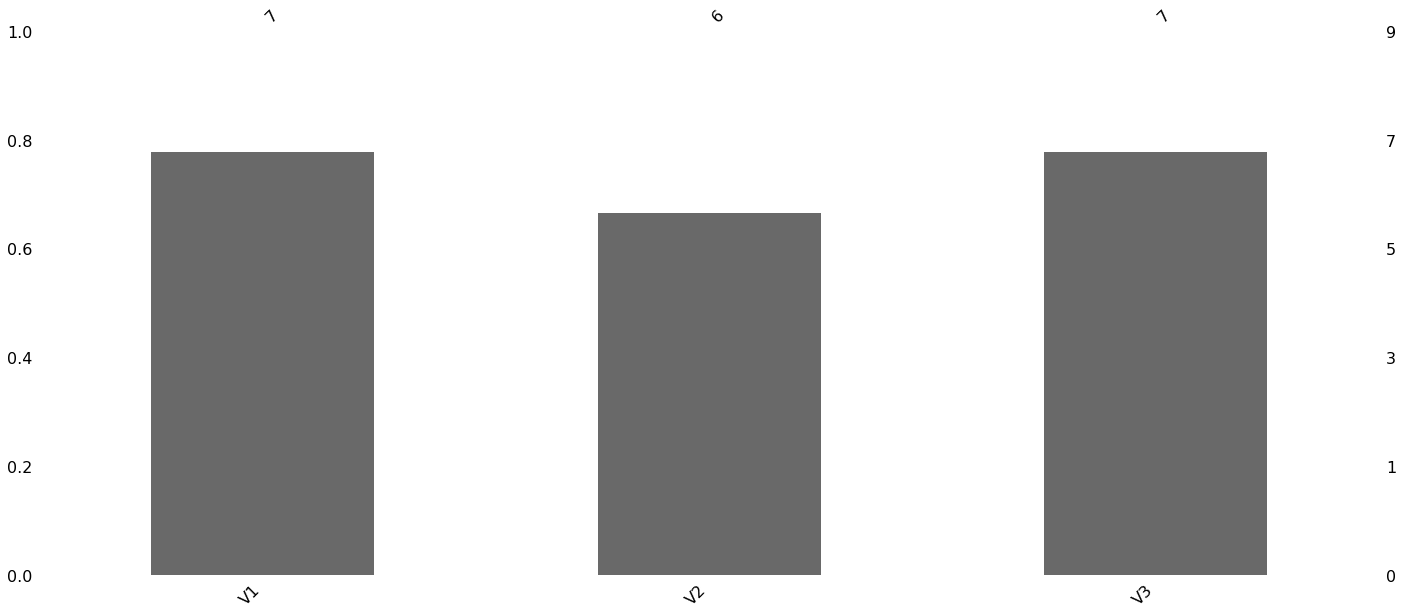

In [52]:
msno.bar(df)

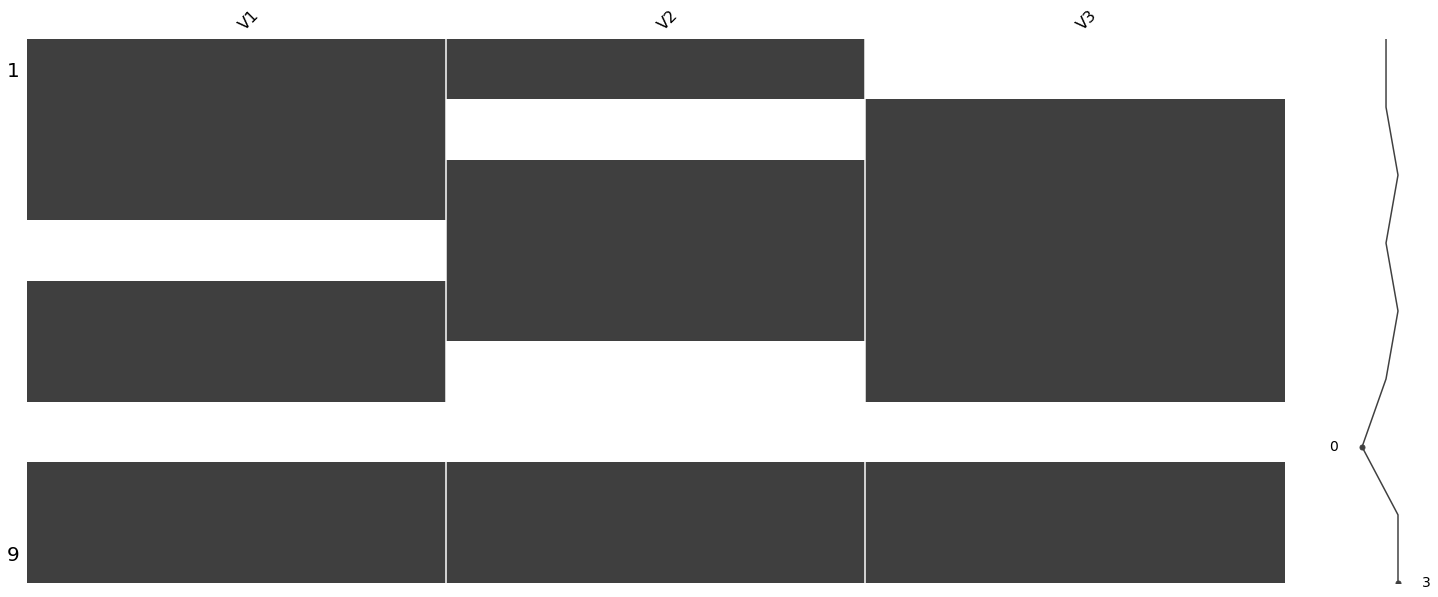

In [53]:
msno.matrix(df)  # soldaki eksen gözlem birimlerini ifade eder

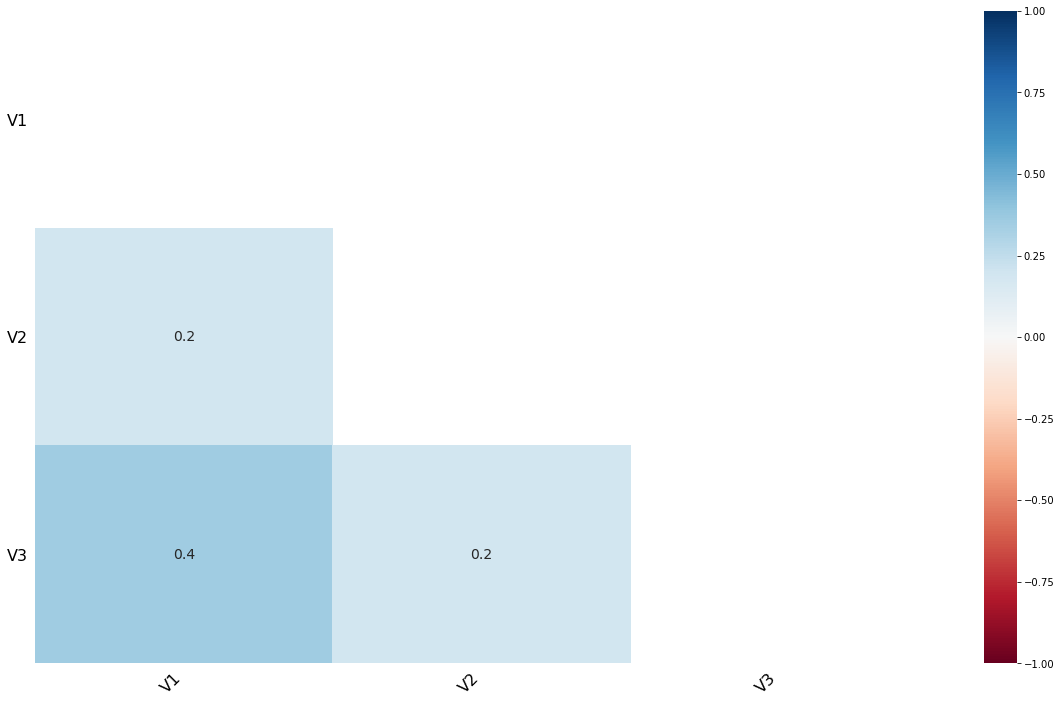

In [54]:
# değişkenler ile boşluk arasındaki korleasyonu verir. +1 ile -1 arasında korelasyon sayısı verir
msno.heatmap(df)

## Silme Yöntemleri

In [55]:
df.dropna()  # en az 1 eksik değere sahip olan gözlemleri siler

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [56]:
df.dropna(how='all')  # tüm değişkenleri eksik olan gözlemleri sil

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [57]:
df.dropna(axis=1)  # en az 1 eksik değere sahip olan değişkeni sil

""
0
1
2
3
4
5
6
7
8


In [58]:
df.dropna(axis=1, how='all')  # tüm değerleri eksik olan değişkeni siler

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


# Değer Atama Yöntemleri

## Sayısal Değişkenlerde Değer Atama

In [59]:
import numpy as np
import pandas as pd

v1 = np.array([1, 3, 6, np.nan, 7, 1, np.nan, 9, 15])
v2 = np.array([7, np.nan, 5, 8, 12, np.nan, np.nan, 2, 3])
v3 = np.array([np.nan, 12, 5, 6, 14, 7, np.nan, 2, 31])

df = pd.DataFrame(
    {
        'V1': v1,
        'V2': v2,
        'V3': v3
    }
)
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [63]:
# tüm değişkenlerdeki eksik değerleri o değişkenin ortalaması ile değiştir
df.apply(lambda x: x.fillna(x.mean()), axis=0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [65]:
df.fillna(df.mean())  # yukarıdakinin biraz daha kısa hali

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


## Kategorik Değişken Kırılımında Değer Atama

In [73]:
v1 = np.array([1, 3, 6, np.nan, 7, 1, np.nan, 9, 15])
v2 = np.array([7, np.nan, 5, 8, 12, np.nan, np.nan, 2, 3])
v3 = np.array([np.nan, 12, 5, 6, 14, 7, np.nan, 2, 31])
v4 = np.array(['IT', 'IT', 'IK', 'IK', 'IK', 'IK', 'IK', 'IT', 'IT'])

df = pd.DataFrame({
    'maas': v1,
    'V2': v2,
    'V3': v3,
    'departman': v4
})

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [74]:
df.groupby('departman').mean()

,maas,V2,V3
departman,,,
IK,4.666667,8.333333,8.0
IT,7.000000,4.000000,15.0


In [76]:
df['maas'] = df['maas'].fillna(df.groupby(
    'departman')['maas'].transform('mean'))

In [77]:
df

,maas,V2,V3,departman
0,1.000000,7.0,NaN,IT
1,3.000000,NaN,12.0,IT
2,6.000000,5.0,5.0,IK
3,4.666667,8.0,6.0,IK
4,7.000000,12.0,14.0,IK
5,1.000000,NaN,7.0,IK
6,4.666667,NaN,NaN,IK
7,9.000000,2.0,2.0,IT
8,15.000000,3.0,31.0,IT


## Kategorik Değişkenler İçin Eksik Değer Atama

In [91]:
v1 = np.array([1, 3, 6, np.nan, 7, 1, np.nan, 9, 15])
v2 = np.array(['IT', np.nan, 'IK', 'IK', 'IK',
               'IK', 'IK', 'IT', 'IT'], dtype=object)

df = pd.DataFrame({
    'maas': v1,
    'departman': v2
})

df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [86]:
# departman değişkeninin mode'u yani en çok tekrar eden elemanı atandı
df['departman'].fillna(df['departman'].mode()[0])

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [94]:
# ilgili indextexi eksikliği kendisinden sonra gelen indexteki değer ile doldurur
df['departman'].fillna(method='bfill')

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [93]:
# ilgili indextexi eksikliği kendisinden önce gelen indexteki değer ile doldurur
df['departman'].fillna(method='ffill')

0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

## Tahmine Dayalı Değer Atama

In [95]:
import seaborn as sns
import missingno as msno

df = sns.load_dataset('titanic')
df = df.select_dtypes(include=['float64', 'int64'])

print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [96]:
!pip install ycimpute

     |████████████████████████████████| 108.9 MB 174 kB/s eta 0:00:01   |                                | 215 kB 2.0 MB/s eta 0:00:55     |██▏                             | 7.3 MB 1.0 MB/s eta 0:01:38
